In [64]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from LLS_main import LLS

In [65]:
data = pd.read_csv("Dollar_Rial_Price_Dataset.csv")
data

,Unnamed: 0,Date,Persian_Date,Open,Low,High,Close
0,0,11/27/2011,1390/09/06,"13,700","13,700","13,700","13,700"
1,1,11/28/2011,1390/09/07,"13,440","13,440","13,440","13,440"
2,2,11/29/2011,1390/09/08,"13,350","13,350","13,350","13,350"
3,3,11/30/2011,1390/09/09,"13,400","13,400","13,400","13,400"
4,4,12/1/2011,1390/09/10,"13,500","13,500","13,500","13,500"
...,...,...,...,...,...,...,...
3305,3305,7/1/2023,1402/04/10,"492,660","492,600","498,400","498,220"
3306,3306,7/2/2023,1402/04/11,"500,810","498,600","500,900","499,340"
3307,3307,7/3/2023,1402/04/12,"503,210","501,400","503,400","502,000"
3308,3308,7/4/2023,1402/04/13,"502,140","498,300","502,200","500,750"


In [66]:
data.drop("Unnamed: 0" , axis =1 , inplace=True)
data["Persian_Date"] = data["Persian_Date"].str.replace("/" , "-")
data

,Date,Persian_Date,Open,Low,High,Close
0,11/27/2011,1390-09-06,"13,700","13,700","13,700","13,700"
1,11/28/2011,1390-09-07,"13,440","13,440","13,440","13,440"
2,11/29/2011,1390-09-08,"13,350","13,350","13,350","13,350"
3,11/30/2011,1390-09-09,"13,400","13,400","13,400","13,400"
4,12/1/2011,1390-09-10,"13,500","13,500","13,500","13,500"
...,...,...,...,...,...,...
3305,7/1/2023,1402-04-10,"492,660","492,600","498,400","498,220"
3306,7/2/2023,1402-04-11,"500,810","498,600","500,900","499,340"
3307,7/3/2023,1402-04-12,"503,210","501,400","503,400","502,000"
3308,7/4/2023,1402-04-13,"502,140","498,300","502,200","500,750"


In [67]:
data["presidency"] = None

for i in range(len(data)) :
    if 1384 <= int(data["Persian_Date"][i][0:4]) and int(data["Persian_Date"][i][0:4]) <= 1390:
        data["presidency"][i] = "Ahmadi Nejad"
    elif 1392 < int(data["Persian_Date"][i][0:4]) and int(data["Persian_Date"][i][0:4]) < 1400:
        data["presidency"][i] = "Rouhani"
    else:
        data["presidency"][i] = "Raisi"
data.reset_index()

,index,Date,Persian_Date,Open,Low,High,Close,presidency
0,0,11/27/2011,1390-09-06,"13,700","13,700","13,700","13,700",Ahmadi Nejad
1,1,11/28/2011,1390-09-07,"13,440","13,440","13,440","13,440",Ahmadi Nejad
2,2,11/29/2011,1390-09-08,"13,350","13,350","13,350","13,350",Ahmadi Nejad
3,3,11/30/2011,1390-09-09,"13,400","13,400","13,400","13,400",Ahmadi Nejad
4,4,12/1/2011,1390-09-10,"13,500","13,500","13,500","13,500",Ahmadi Nejad
...,...,...,...,...,...,...,...,...
3305,3305,7/1/2023,1402-04-10,"492,660","492,600","498,400","498,220",Raisi
3306,3306,7/2/2023,1402-04-11,"500,810","498,600","500,900","499,340",Raisi
3307,3307,7/3/2023,1402-04-12,"503,210","501,400","503,400","502,000",Raisi
3308,3308,7/4/2023,1402-04-13,"502,140","498,300","502,200","500,750",Raisi


In [68]:
data["Low"] = data["Low"].str.replace("," , "")
data["Low"] = data["Low"].astype(int)

In [69]:
print('Ahmadi Nejad: ', data['Low'].min())
print('Rouhani: ', data['Low'].min())
print('Ebram: ', data['Low'].min())

Ahmadi Nejad:  12850
Rouhani:  12850
Ebram:  12850


---

In [70]:
data["N_Date"] = None
for i in range(len(data)):
    r = data["Persian_Date"][i].split("-")
    y, m, d = int(r[0]), int(r[1]), int(r[2])
    data["N_Date"][i] = int(y)*365 + int(m)*30 + int(d)
data["N_Date"] = data["N_Date"].to_numpy(dtype=int)
data

c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Date,Persian_Date,Open,Low,High,Close,presidency,N_Date
0,11/27/2011,1390-09-06,"13,700",13700,"13,700","13,700",Ahmadi Nejad,507626
1,11/28/2011,1390-09-07,"13,440",13440,"13,440","13,440",Ahmadi Nejad,507627
2,11/29/2011,1390-09-08,"13,350",13350,"13,350","13,350",Ahmadi Nejad,507628
3,11/30/2011,1390-09-09,"13,400",13400,"13,400","13,400",Ahmadi Nejad,507629
4,12/1/2011,1390-09-10,"13,500",13500,"13,500","13,500",Ahmadi Nejad,507630
...,...,...,...,...,...,...,...,...
3305,7/1/2023,1402-04-10,"492,660",492600,"498,400","498,220",Raisi,511860
3306,7/2/2023,1402-04-11,"500,810",498600,"500,900","499,340",Raisi,511861
3307,7/3/2023,1402-04-12,"503,210",501400,"503,400","502,000",Raisi,511862
3308,7/4/2023,1402-04-13,"502,140",498300,"502,200","500,750",Raisi,511863


In [71]:
data["Close"] = data["Close"].str.replace(",", "").astype(int)
X = data[["N_Date"]].to_numpy(dtype=int)
Y = data[["Close"]].to_numpy(dtype=int)
data.corr()

,Low,Close,N_Date
Low,1.000000,0.999639,0.858023
Close,0.999639,1.000000,0.857901
N_Date,0.858023,0.857901,1.000000


In [72]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size=0.2 , shuffle=True)
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((2648, 1), (662, 1), (2648, 1), (662, 1))

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

lls= LinearRegression()
lls.fit(X_train,Y_train)

Y_pred = lls.predict(X_test)

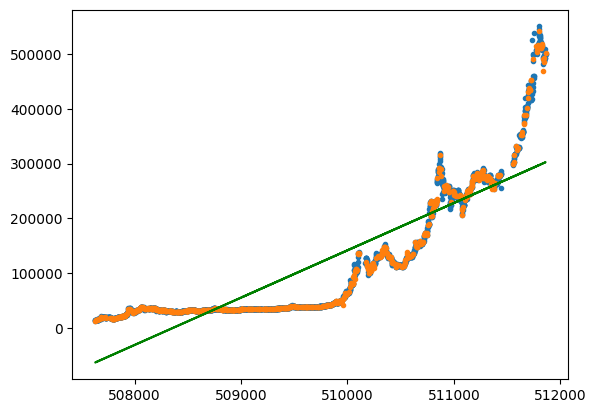

In [74]:
plt.scatter(X_train, Y_train, marker=".")
plt.scatter(X_test, Y_test, marker=".")
plt.plot(X_test, Y_pred, color= "green")
plt.show()

In [75]:
metrics.mean_absolute_error(Y_pred, Y_test)

47980.36426498317